In [403]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 10
smoking_df = pd.read_csv("smoking.csv")
from pandasql import sqldf

In [405]:
def smoke_to_num(x):
    if x == "Yes":
        return 1
    else:
        return 0
smoking_df = smoking_df[["gender", "age", "marital_status", "highest_qualification", "nationality", "ethnicity", "gross_income", "region", "smoke"]]
smoking_df["smoke"] = smoking_df["smoke"].apply(smoke_to_num)

Text(0.5, 1.0, 'Percentage of Sample that Smokes by Marital Status')

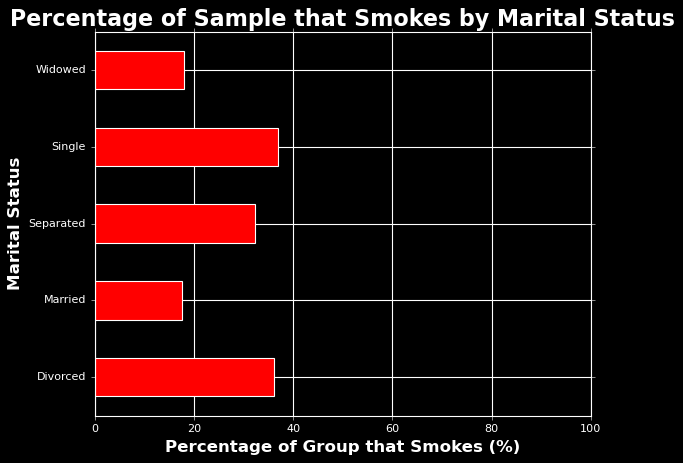

In [407]:
graph_1_df = sqldf("select marital_status, count(*) as total, sum(smoke) as total_smoke from smoking_df group by marital_status", locals())
plt.style.use("dark_background")
graph_1_df = graph_1_df.set_index("marital_status")
graph_1_df["Percentage of Group that Smokes"] = (graph_1_df["total_smoke"] / graph_1_df["total"]) * 100

ax = (graph_1_df["Percentage of Group that Smokes"]).plot.barh(color = "red")
ax.set_xlabel("Percentage of Group that Smokes (%)", fontdict = {"fontweight": "bold", "fontsize" : 15})
ax.set_ylabel("Marital Status", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_xbound([0, 100])
ax.set_title("Percentage of Sample that Smokes by Marital Status", fontdict = {"fontsize" : 20, "fontweight": "bold"})

## Introduction
We have worked hard as a society to abolish smoking as a socially accepted tool. That being said, there are many that still struggle with a smoking addiction that is creating lasting affects on their health, potentially drastically shortening their lifespan. Our surroundings often play a large role in determining the type of lifestyle that we chose to live. Having a partner, for example, might pursuade us to become the best versions of ourselves. Another aspect that can have a real impact on our health choices is gender. If a man smokes, he may be seen as simply letting off steam, whereas if a woman smokes she may be more heavily looked down upon. For better or for worse, opinions change the way that we act just as much as our relationship status. But which plays a greater role, and which demographic of people are must at risk of impacting their health from smoking?

In this report, I statistically show which broad group of people is most likley to have the largest amount of smokers and explain what this might mean for how we can better limit smoking for all in the future. 

## Background
This data was put together by Stats4Schools and was collected from <a href = "https://www.stem.org.uk/resources/elibrary/resource/28452/large-datasets-stats4schools">stem.org.uk</a>. The dataset includes many variables that potentially play a role in determining the probability that someone smokes tobacco. The variables used in this investigation include:

<ul>
    <li><b>marital_status:</b> Marital Status (Divorced, Married, Single, etc.)</li>
    <li><b>gender:</b> (Male, Female)</li>
    <li><b>age</b></li>
    <li><b>highest_qualification:</b> Highest Level of Education</li>
    <li><b>ethnicity:</b> (Asian, Black, Chinese, Mixed, White, Refused and Unknown)</li>
    <li><b>gross_income: </b>(Under 2,600, 2,600 to 5,200, 5,200 to 10,400, 10,400 to 15,600, 15,600 to 20,800, 20,800 to 28,600, 28,600 to 36,400, Above 36,400, Refused and Unknown)</li>
    <li><b>smoke: </b> Whether or not the person smokes (Yes, No)</li>
</ul>

The `smoke` column will be modified to contain ones and zeros. (1 = Yes, 0 = No)

## Inference on Difference of Proportion of Smokers

### **Part 1:** Married vs. Single

For the sake of simplicity, and drawing real conclusions, we will just focus on the single and the married people in the `marital_status` column. At least from our sample, these two groups have the greatest difference in proportions from this column. To draw a conclusion about the respective percentages from the population, we can conduct a hypothesis test as well as a confidence interval.

The graph below shows the number of smokers and non-smokers we have in our dataset from the `Single` and `Married` catagories. The total number of smokers in both is very similar but the percentage of the total number is much different. 

<center>

<h1 style= "text-align: left;">Hypothesis Testing</h1>

<b>Using a significance level of $0.05$</b>

<h3 style="font-size:150%; text-align: left"><b>Step 1: Model Statement</b></h3>

<p style="font-size:125%; text-align: center">$X_\text{Single} \sim \text{Binomial}(158,p_\text{Single})$</p>

<p style="font-size:125%; text-align: center">$X_\text{Married}  \sim \text{Binomial}(143,p_\text{Married})$</p>

<h3 style="font-size:150%; text-align: left"><b>Step 2: State Hypotheses</b></h3>

<p style="font-size:125%; text-align: center">$H_0: p_\text{Single} = p_\text{Married}$</p>

<p style="font-size:125%; text-align: center">$H_{\alpha}: p_\text{Single} \neq p_\text{Married}$</p>

<h3 style="font-size:150%; text-align: left"><b>Step 3: Test Statistic and Null Distribution</b></h3>

<p style="font-size:140%; text-align: center">Test Statistic and Null Distribution for Difference of Proportions:</p>

<p style="color:gray; font-size:170%; text-align: center">$Z = \frac{(\hat{p_1} - \hat{p_2}) - (0)}{\sqrt{
\frac{\bar{p}(1-\bar{p})}{n_1} + \frac{\bar{p}(1-\bar{p})}{n_2}}} \sim
N(0, 1)$</p>

<h3 style="font-size:150%; text-align: left"><b>Step 4: Identify Relevant Outcomes</b></h3>

<p style="font-size:125%; text-align: center">$\text{Single vs. Married Test Statistic} = 7.564$</p>

<h3 style="font-size:150%; text-align: left"><b>Step 5: Calculate a P-Value</b></h3>

<p style="color:gray; font-size:170%; text-align: center">$\text{P-Value} = 2 \cdot P(Z > |z|)$</p>

<p style="font-size:125%; text-align: center">$\text{Single vs. Married P-Value} = 3.909 \times 10^{-14}$</p>

<h1>Confidence Interval (C = 0.95)</h1>

<p style="font-size:140%; text-align: left">General Formula for Confidence Interval:</p>

<p style="color:gray; font-size:170%; text-align: center">$\text{Point Estimate } \pm \text{ Quantile Confidence Score * Standard
Error of PE}$</p>

<p style="font-size:140%; text-align: left">Confidence Interval for Difference in Proportions:</p>

<b>Using the Agresti-Coffe Adjustment</b>

<p style="color:gray; font-size:170%; text-align: center">$\hat{p_{1AC}} - \hat{p_{2AC}} \pm \text{qnorm(C + (1-C)/2)} * \sqrt{
\frac{\hat{p}_{1AC}(1-\hat{p}_{1AC})}{n_1+2} +
\frac{\hat{p}_{2AC}(1-\hat{p}_{2AC})}{n_2+2} }$</p>

<p style="color:gray; font-size:170%; text-align: center">$\frac{158 + 2}{427 + 4} - \frac{143 + 2}{812 + 4} \pm \text{qnorm(0.95 + (1-0.95)/2)} * \sqrt{
\frac{\frac{158 + 2}{427 + 4}(1-\frac{158 + 2}{427 + 4})}{427+2} +
\frac{\frac{143 + 2}{812 + 4}(1-\frac{143 + 2}{812 + 4})}{812+2} }$</p>

<p style="font-size:170%; text-align: center">$\text{Left Bound: } 0.141$</p>

<p style= "font-size:170%; text-align: center;">$ \text{  Right Bound: } 0.246$</p>

</center>

,total,total_smoke,non_smoke,perc_smoke
marital_status,,,,
Married,812,143,669,17.610837
Single,427,158,269,37.002342


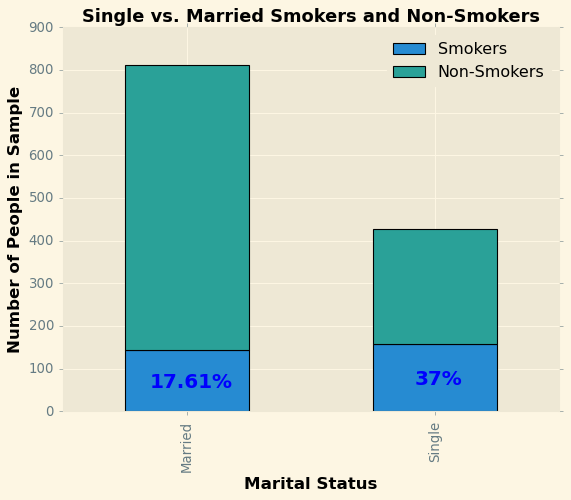

In [562]:
graph_2_df = sqldf("select marital_status, count(*) as total, sum(smoke) as total_smoke, (count(*) - sum(smoke)) as non_smoke from smoking_df where marital_status = 'Single' OR marital_status = 'Married' group by marital_status")
graph_2_df = graph_2_df.set_index("marital_status")
plt.style.use("Solarize_Light2")

ax = graph_2_df.plot.bar(y = ["total_smoke", "non_smoke"], stacked = True)
ax.text(s = "17.61%", y = 55, x = -0.15, color = "blue", size = 18, fontdict = {"fontweight" : "bold"})
ax.text(s = "37%", y = 63, x = 0.92, color = "blue", size = 18, fontdict = {"fontweight" : "bold"})
ax.set_title("Single vs. Married Smokers and Non-Smokers", color = "black", fontdict = {"fontweight" : "bold"})
ax.set_xlabel("Marital Status", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.set_ylabel("Number of People in Sample", color = "black", fontdict = {"fontweight" : "bold", "fontsize": 15})
ax.legend(["Smokers", "Non-Smokers"], loc="upper right", labelcolor = "black")

graph_3_df = graph_2_df
graph_3_df["perc_smoke"] = 100 * graph_3_df["total_smoke"] / graph_3_df["total"]

graph_3_df

In [611]:
x1 = 158
n1 = 427
x2 = 143
n2 = 812

# Confidence level
alpha = 0.95

# We will use "tilde" to refer to the AC-adjusted statistics
# This code computes the AC Confidence Interval for the true difference in two proportions
ntilde1 = n1 + 2
ntilde2 = n2 + 2
ptilde1 = (x1+1)/ntilde1
ptilde2 = (x2+1)/ntilde2

pe = ptilde1 - ptilde2

se1 = sqrt( ptilde1*(1-ptilde1)/ntilde1 )
se2 = sqrt( ptilde2*(1-ptilde2)/ntilde2 )
se = sqrt(se1**2 + se2**2 )
moe = 1.96 * se

left = pe - moe
right = pe + moe

print(left, right)

0.14103734219228348 0.24641304525810398
